# Lack of evidence for differences in metabolome across replicates

A key statement made in the draft is: 
    
    "Taking the high dynamic of the metabolome into account, small shifts in the timescale of the growth pattern would propagate into differenced on the metabolite level and thus increase the variability artificially." 
    
I cannot find support for this statement in the data. While there is some small decrase in variability in the growth characteristics of maincultures compared to precultures, there is not a significant difference in the traditional cultivation approach compared to the adaptive approach (i.e. 02_NonAlignment_10Precultures compared to 03_MetabolomeAnalysis_ClassicApproach_AllData). The variances of all measured growth characteristics (rate, carrying capacity, etc) are comparable. 

**More important**, there is no evidence that slight shifts in growth profile lead to differences in the metabolome. More specifically: 

    high growth variability != high metabolome variability. 
    
In fact, I observe weak (potentially insignificant) effects in the opposite direction!!

Thus we need to rethink this part of the manuscript. From the perspective of reproducibility, there seems to be no advantage of WCB. I cannot support the statement that growth alignment with WCB affects data quality/consistency given that data of which I am aware. The data looks pretty much the same regardless.

Below I include some figures to illustrate this point.

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

In [1]:
suppressMessages({
    .libPaths(c("/g/steinmetz/brooks/anaconda/lib/R/library",
               "/g/steinmetz/brooks/R/x86_64-pc-linux-gnu-library/3.3",
               "/root/anaconda3/envs/jupyter/lib/R/library"))
    # config opts and libraries
    options(repr.plot.width = 4)
    options(repr.plot.height = 3)
    options(jupyter.plot_mimetypes = 'image/png')
    library(forcats)
    library(readxl)
    library(cowplot)
    library(growthcurver)
    devtools::source_url("https://raw.githubusercontent.com/scalefreegan/R-tools/master/defaultRlibs.R")
    devtools::source_url("https://raw.githubusercontent.com/scalefreegan/steinmetz-lab/master/yeast2_0/scripts/seqtools.R")
})

BASEDIR = "/g/steinmetz/project/GenPhen/paper"
SUBDIR2 = "data/02_NonAlignment_10Precultures"
SUBDIR3 = "data/03_MetabolomeAnalysisClassicApproach"

# 02_NonAlignment_10Precultures
d02_preculture = readRDS(file.path(BASEDIR,SUBDIR2,"precultureGrowth.RDS"))
d02_mainculture = readRDS(file.path(BASEDIR,SUBDIR2,"maincultureGrowth.RDS"))
d02_cellconc = readRDS(file.path(BASEDIR,SUBDIR2,"cellconc.RDS"))

# 03_MetabolomeAnalysis_ClassicApproach_AllData
d03_preculture_tecan = readRDS(file.path(BASEDIR,SUBDIR3,"preculture_tecan.RDS"))
d03_preculture_od = readRDS(file.path(BASEDIR,SUBDIR3,"preculture_od.RDS"))
d03_preculture_cellconc = readRDS(file.path(BASEDIR,SUBDIR3,"preculture_cellconc.RDS"))
d03_mainculture_tecan = readRDS(file.path(BASEDIR,SUBDIR3,"mainculture_tecan.RDS"))
d03_mainculture_od = readRDS(file.path(BASEDIR,SUBDIR3,"mainculture_od.RDS"))
d03_mainculture_other = readRDS(file.path(BASEDIR,SUBDIR3,"mainculture_other.RDS"))
d03_mainculture_glucose = readRDS(file.path(BASEDIR,SUBDIR3,"mainculture_glucose.RDS"))
d03_mainculture_endo = readRDS(file.path(BASEDIR,SUBDIR3,"mainculture_endo.RDS"))

d_growth = rbind(d03_preculture_tecan %>% mutate(type = "preculture"),
                d03_mainculture_tecan %>% mutate(type = "mainculture"))

# Transformation function
scaleFUN <- function(x) sprintf("%.2f", x)

In [3]:
# Analysis of growth data from replicate cultures

# options(repr.plot.width = 4)
# options(repr.plot.height = 3)
# d02_comb = rbind(d02_preculture %>% mutate(type="preculture"),
#                 d02_mainculture %>% mutate(type="mainculture"))
# p <- ggplot(d02_comb) + geom_point(aes(x=time,y=value,color=type))
# p

# d_wide_pre = d02_preculture %>% unite(tmp,sample,replicate,sep=".") %>% 
#     spread(tmp,value)
# gc_out_pre = SummarizeGrowthByPlate(d_wide_pre, t_trim = 25) %>% mutate(type = "pre")

# d_wide_main = d02_mainculture %>% unite(tmp,sample,replicate,sep=".") %>% 
#     spread(tmp,value)
# gc_out_main = SummarizeGrowthByPlate(d_wide_main, t_trim = 25) %>% mutate(type = "main")

# d_wide_main_adapted = d03_mainculture_tecan %>% unite(tmp,sample,replicate,sep=".") %>% 
#     spread(tmp,value)
# gc_out_main_adapted = SummarizeGrowthByPlate(filter(d_wide_main_adapted,time<=25), t_trim = 25) %>% 
#                         mutate(type = "main_adapted")

# gc_out = rbind(gc_out_pre,gc_out_main,gc_out_main_adapted) %>% 
#          separate(sample,into=c("sample","replicate"),sep = "\\.")

# a = filter(gc_out,type=="main_adapted")
# b = filter(gc_out,type=="pre")
# var.test(a$t_mid,b$t_mid)

# p1 <- ggplot(gc_out) + geom_boxplot(aes(y=r,x=type))
# p1

# d_comb = rbind(d02_mainculture %>% mutate(type="non-aligned"),
#               d03_mainculture_tecan %>% mutate(type="aligned"))
# p2 <- ggplot(filter(d_comb,time<=25),aes(x=time,y=value,color=type)) + geom_point() + 
#     ylab("Tecan Abs")
# p2

## Figure 1: Growth characteristics in classic cultivation approach

From data in 03_MetabolomeAnalysisClassicApproach

No sig differences in variances between pre and main cultures here. In previous experiment (02_NonAlignment_10Precultures) there is lower variance in main culture. In any case the effect is weak. 

Warning message:
“Removed 9 rows containing missing values (geom_point).”

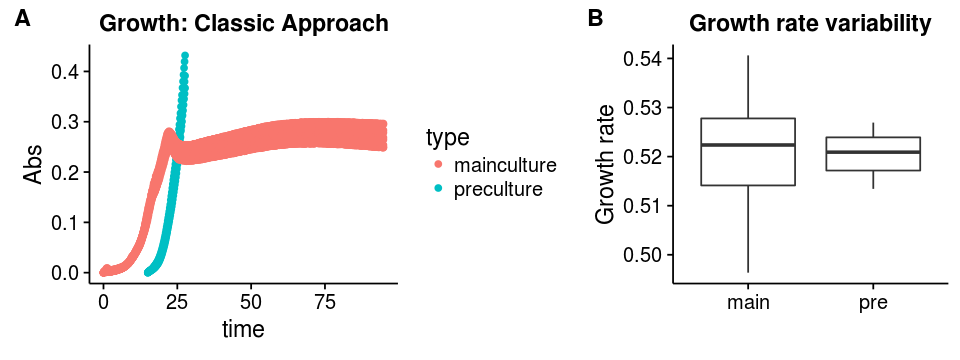

In [11]:
d_wide_pre = d03_preculture_tecan %>% unite(tmp,sample,replicate,sep=".") %>% 
    spread(tmp,value)
gc_out_pre = SummarizeGrowthByPlate(d_wide_pre, t_trim = 25) %>% mutate(type = "pre")

d_wide_main = d02_mainculture %>% unite(tmp,sample,replicate,sep=".") %>% 
    spread(tmp,value)
gc_out_main = SummarizeGrowthByPlate(d_wide_main, t_trim = 25) %>% mutate(type = "main")

gc_out = rbind(gc_out_pre,gc_out_main) %>% 
         separate(sample,into=c("sample","replicate"),sep = "\\.")

a <- ggplot(d_growth) + geom_point(aes(x=time,y=value,color=type)) + 
    ggtitle("Growth: Classic Approach") + ylab("Abs")

b <- ggplot(gc_out) + geom_boxplot(aes(y=r,x=type)) + 
    ggtitle("Growth rate variability") + ylab("Growth rate") + xlab("")

options(repr.plot.width = 8)
options(repr.plot.height = 3)
p <- plot_grid(a, b, labels = c("A", "B"), nrow = 1, align = "h",rel_widths = c(1.5,1))
p

## Figure 2: Differences in growth variability across three bioreps

As noted in draft, biorep C has greater variance (shift) in the growth at each sampling point. You can see a clear trend in the variance among samples: var B < A < C. 

If these cultivation/growth differences affect measurement of the metabolome, we would expect to see a similar trend in the variance of measured metabolites, namely: var B < A < C.

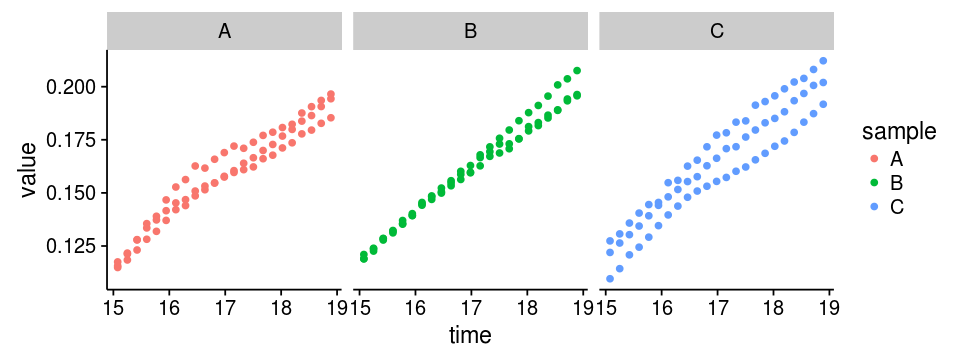

In [12]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
p1 <- ggplot(filter(d03_mainculture_tecan,time>15,time<19)) + geom_point(aes(x=time,y=value,color=sample)) +
    #geom_smooth(aes(x=time,y=value,color=sample),na.rm = T) + 
    #scale_y_continuous(trans="log2") +
    facet_wrap(~sample)
p1

## Figure 3: Increase in growth variability associated with decrease in metabolite conc. variability

Contrary to the expectation, most metabolites have decreased variance in Biorep C, which has the highest growth variability. AKG, ARG, ASN, ASP, CAN, CIT, CYS...etc all display this behavior. There are some expections (e.g. GLUC and HSE/THR) where the trend is as we would expect it.

Here I compute the median variance for each biorep across timepoints, only using timepoints where metabolites were measured.

Notice slight (perhaps insignificant) trend towards decreased metabolite variance as growth variance increases in boxplot. 

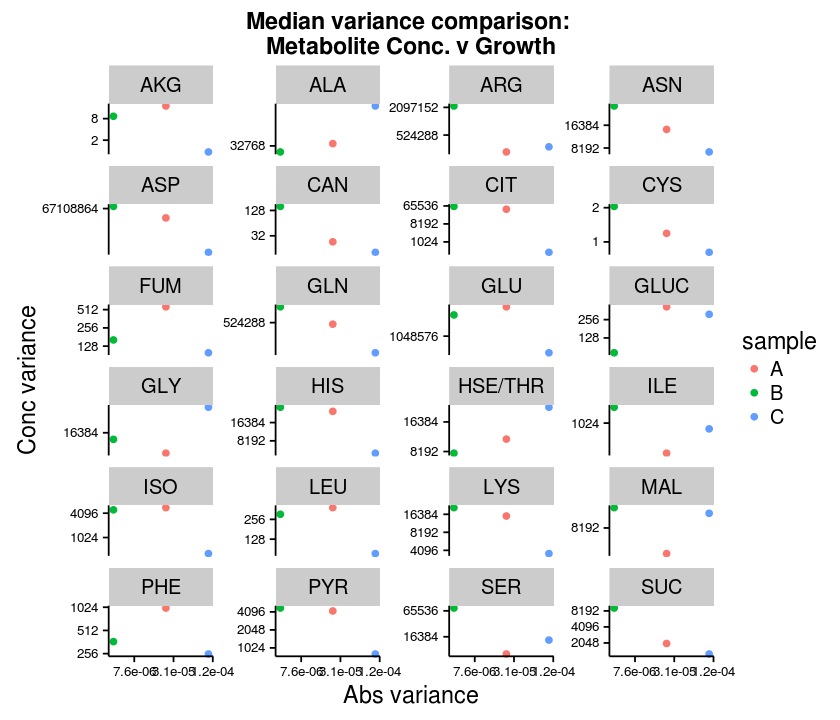

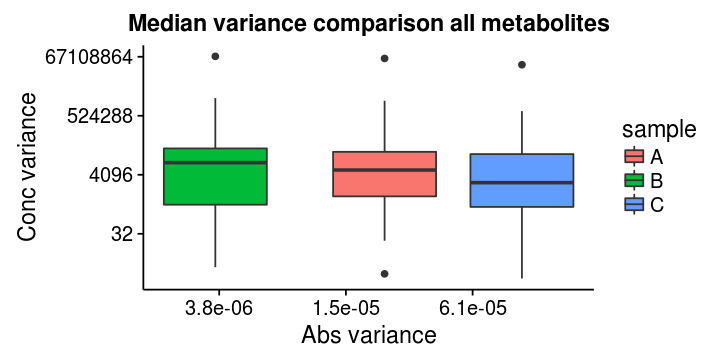

In [48]:
abs_summary = filter(d03_mainculture_tecan,time>=15,time<=19) %>% group_by(sample,time) %>% 
                dplyr::summarize(abs.mean = median(value,na.rm = T), abs.var = var(value,na.rm = T)) %>%
                mutate(time.round = round(time)) %>% group_by(sample,time.round) %>%
                filter(abs(time-time.round)==min(abs(time-time.round))) %>% mutate(time = time.round) %>%
                ungroup() %>% select(-time.round)
endo_summary = filter(d03_mainculture_endo,time>=15,time<=19) %>% group_by(sample,metabolite,time) %>% 
                dplyr::summarize(um.mean = median(um,na.rm = T), um.var = var(um,na.rm = T))
comb_summary = merge(endo_summary,abs_summary,by = c("sample","time"))
comb_summary_summary = comb_summary %>% ungroup() %>% group_by(sample,metabolite) %>% 
                    summarise(um.var = median(um.var,na.rm = T),abs.var = median(abs.var,na.rm = T))
options(repr.plot.width = 7)
options(repr.plot.height = 6)
p3.1 <- ggplot(comb_summary_summary) + geom_point(aes(x=abs.var,y=um.var,color=sample),size=1.5) +
    scale_y_continuous(trans="log2") + 
    scale_x_continuous(trans="log2",labels = function(x) format(x, digits = 2,scientific = TRUE)) +
    facet_wrap(~metabolite,scales = "free_y",ncol=4) + 
    theme(axis.text.y = element_text(size=8)) + 
    theme(axis.text.x = element_text(size=8)) +
    xlab("Abs variance") + ylab("Conc variance") +
    ggtitle("Median variance comparison: \nMetabolite Conc. v Growth")
p3.1        
options(repr.plot.width = 6)
options(repr.plot.height = 3)
p3.2 <- ggplot(comb_summary_summary) + geom_boxplot(aes(x=abs.var,y=um.var,fill=sample)) +
    scale_y_continuous(trans="log2") + 
    scale_x_continuous(trans="log2",labels = function(x) format(x, digits = 2,scientific = TRUE)) +
    xlab("Abs variance") + ylab("Conc variance") +
    ggtitle("Median variance comparison all metabolites")
p3.2

## Figure 4: Specific Examples. Increased variability in metabolite given increased growth variability

Very few examples of this trend. Best is HSE/THR. Notice increased variability in Biorep C.

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 2 rows containing missing values (geom_point).”

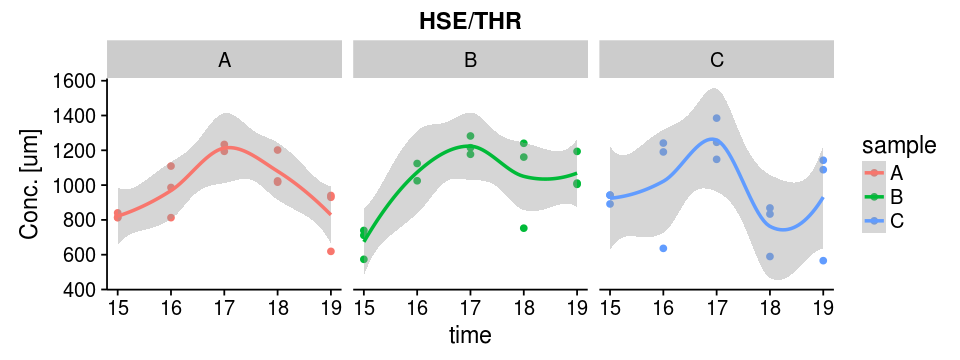

In [39]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
p4 <- ggplot(filter(d03_mainculture_endo,metabolite=="HSE/THR")) + geom_point(aes(x=time,y=um+1,color=sample)) +
        geom_smooth(aes(x=time,y=um,color=sample),na.rm = T) + 
        #scale_y_continuous(trans="log2") + 
        facet_wrap(~sample,ncol = 3) + ylab("Conc. [um]") +
        ggtitle("HSE/THR")
p4

## Figure 5: Specific Examples. Decreased variability in metabolite given increased growth variability

Common. Notice **decreased** variability in Biorep C. It should be higher is the hypothesis is supported...

`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'
Warning message:
“Removed 2 rows containing missing values (geom_point).”

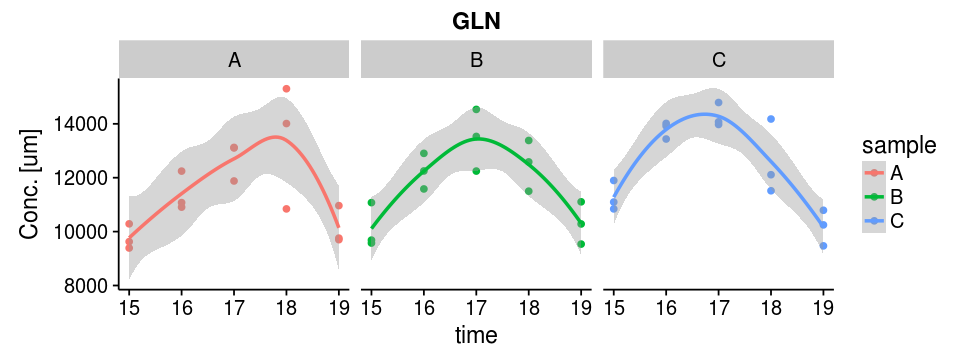

`geom_smooth()` using method = 'loess'


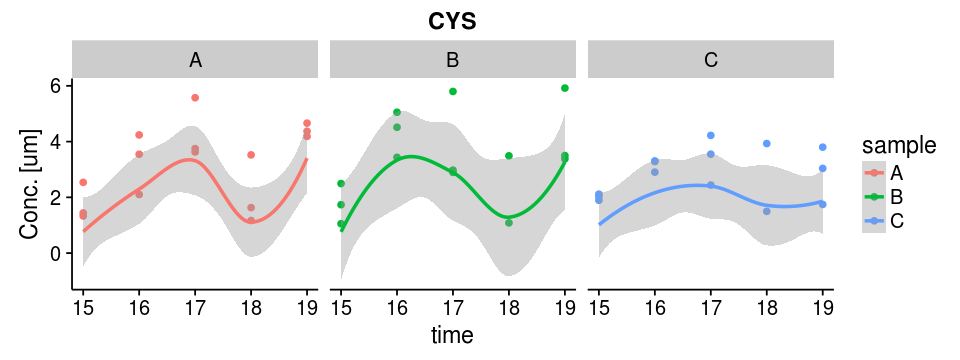

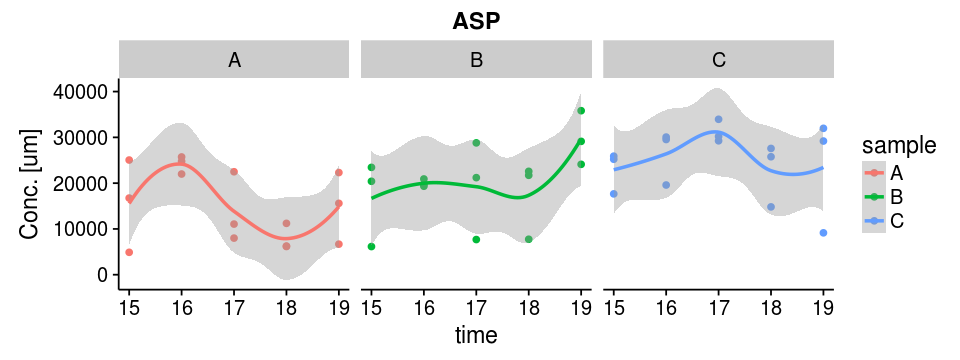

In [44]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
p5 <- ggplot(filter(d03_mainculture_endo,metabolite=="GLN")) + geom_point(aes(x=time,y=um+1,color=sample)) +
        geom_smooth(aes(x=time,y=um,color=sample),na.rm = T) + 
        #scale_y_continuous(trans="log2") + 
        facet_wrap(~sample,ncol = 3) + ylab("Conc. [um]") +
        ggtitle("GLN")
p5
p6 <- ggplot(filter(d03_mainculture_endo,metabolite=="CYS")) + geom_point(aes(x=time,y=um+1,color=sample)) +
        geom_smooth(aes(x=time,y=um,color=sample),na.rm = T) + 
        #scale_y_continuous(trans="log2") + 
        facet_wrap(~sample,ncol = 3) + ylab("Conc. [um]") +
        ggtitle("CYS")
p6
p7 <- ggplot(filter(d03_mainculture_endo,metabolite=="ASP")) + geom_point(aes(x=time,y=um+1,color=sample)) +
        geom_smooth(aes(x=time,y=um,color=sample),na.rm = T) + 
        #scale_y_continuous(trans="log2") + 
        facet_wrap(~sample,ncol = 3) + ylab("Conc. [um]") +
        ggtitle("ASP")
p7